In [1]:
import numbers
# all additional modules are listed in requirements.txt
import numpy as np
import sympy as sp
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib widget needs ipyml, remove if you don't have it
%matplotlib widget
sp.__version__, np.__version__, matplotlib.__version__

('1.12', '1.24.3', '3.7.2')

In [2]:
from sympy import sin, cos, exp, ln
x = sp.symbols('x')
x0 = 1
functions = [sin(x**2), cos(sin(x)), exp(sin(cos(x))), ln(x+3), (x+3)**0.5]
derivatives = [i.diff() for i in functions]
deriv_values = [i.subs(x, x0) for i in derivatives]
x0, functions, derivatives, deriv_values

(1,
 [sin(x**2), cos(sin(x)), exp(sin(cos(x))), log(x + 3), (x + 3)**0.5],
 [2*x*cos(x**2),
  -sin(sin(x))*cos(x),
  -exp(sin(cos(x)))*sin(x)*cos(cos(x)),
  1/(x + 3),
  0.5/(x + 3)**0.5],
 [2*cos(1),
  -sin(sin(1))*cos(1),
  -exp(sin(cos(1)))*sin(1)*cos(cos(1)),
  1/4,
  0.250000000000000])

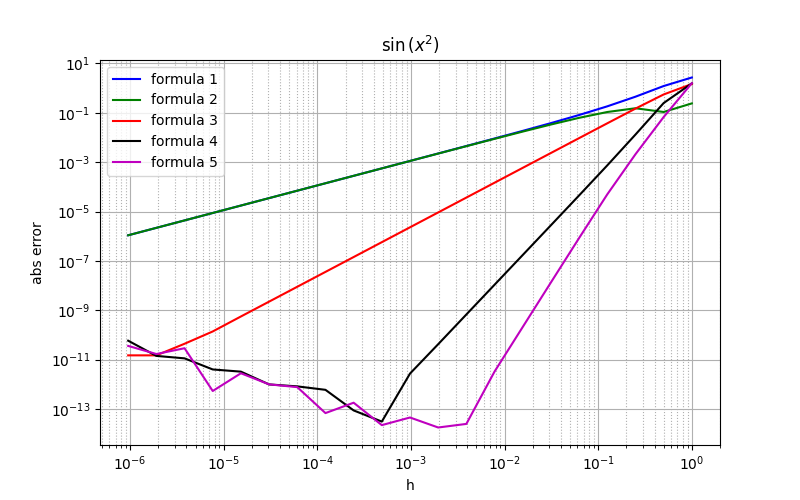

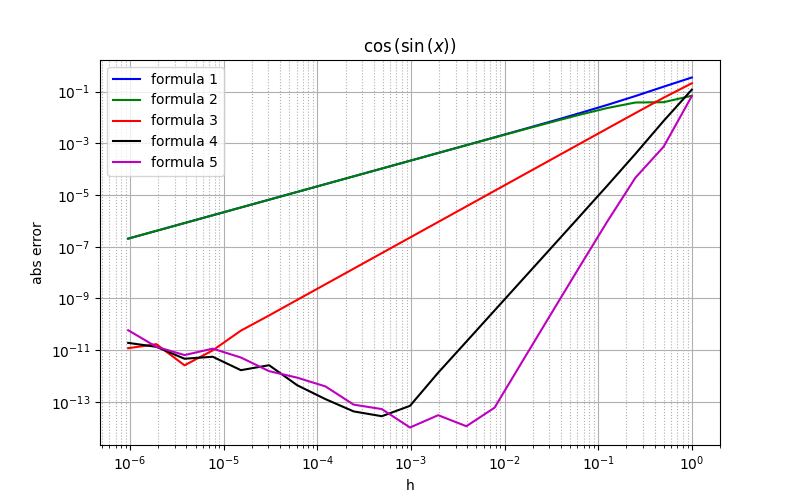

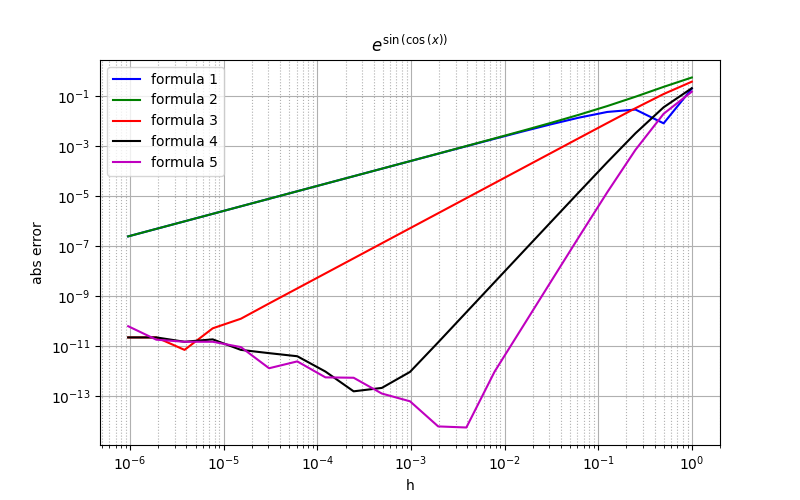

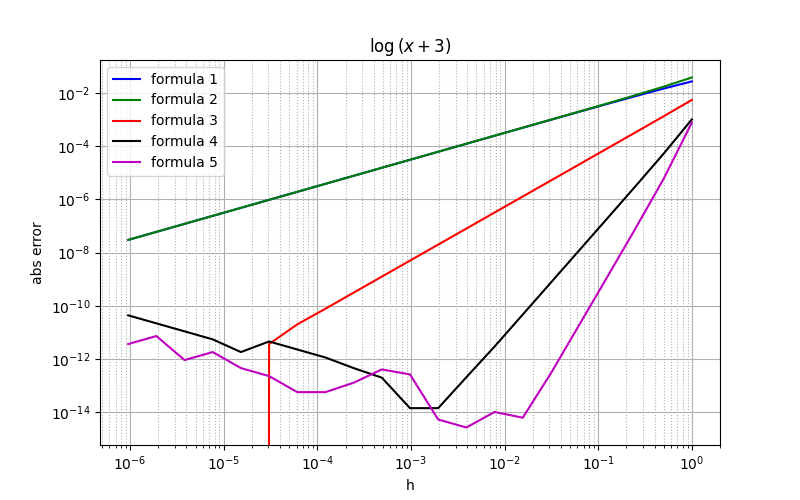

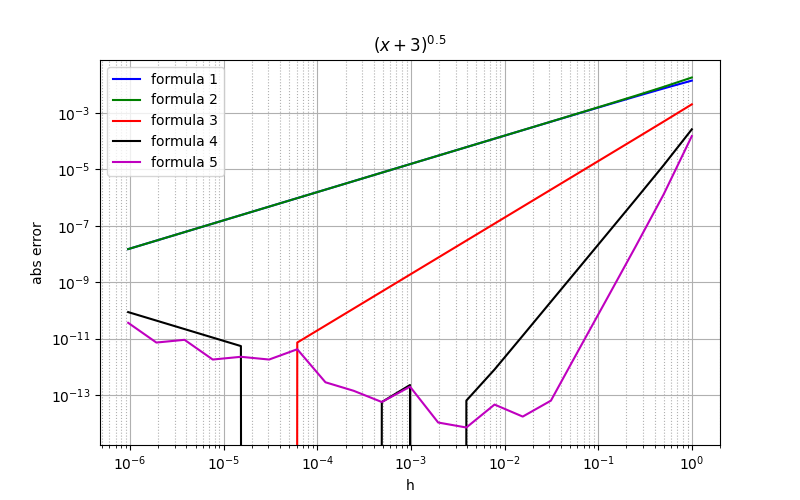

In [3]:
plt.close()
def calc_num_diff(f, points, coeffs):
    f_call = sp.utilities.lambdify(x, f, 'numpy')
    return sum(f_call(x0 + points)*coeffs)

def get_formulas(h):
    return [ # [[points], [coefficients]]
        [[h, 0*h], [1/h, -1/h]],
        [[0*h, -h], [1/h, -1/h]],
        [[h, -h], [1/2/h, -1/2/h]],
        [[h, -h, 2*h, -2*h], [4/3/2/h, -4/3/2/h, -1/3/4/h, 1/3/4/h]],
        [[h, -h, 2*h, -2*h, 3*h, -3*h], [3/4/h, -3/4/h, -3/20/h, 3/20/h, 1/60/h, -1/60/h]]
    ]

for func_ind, func in enumerate(functions):
    fig, ax = plt.subplots(figsize=(8,5))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.minorticks_on()
    ax.grid(True)
    ax.grid(True, 'minor', ls=':')
    h = 2/2**np.arange(1, 22)
    formulas = [[np.array(a), np.array(b)] for a,b in get_formulas(h)]

    for i, formula in enumerate(formulas):
        ax.plot(h, abs(calc_num_diff(func, *formula) - deriv_values[func_ind]), c='bgrkm'[i], label=f'formula {i+1}')

    ax.set_title(f'${sp.latex(func)}$')
    ax.set_ylabel('abs error')
    ax.set_xlabel('h')
    ax.legend(bbox_to_anchor=(0, 1), loc="upper left")